In [20]:
import numpy as np
from utils import *
from classify_samples_MH import *
import joblib
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from performance_utils import *

In [21]:
error_not_distracted_list, u_signal_not_distracted_list, x_signal_not_distracted_list = process_signals(error_file= r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRN/e.csv', u_file=r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRN/u.csv', x_file=r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRN/x.csv')
error_distracted_list, error_distracted_listu_signal_distracted_list, x_signal_distracted_list         = process_signals(error_file= r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/e.csv', u_file=r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/u.csv', x_file=r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/x.csv')

tc_test = np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/mdist.csv', delimiter=',')

In [22]:
std = np.std(error_not_distracted_list[0][0])
mean = np.mean(error_not_distracted_list[0][0])

In [23]:
def plot_signals_with_highlight(tc, ocsvm, mahalanobis, time=None, label1="OCSVM", label2="Mahalanobis", title="Signals with Highlighted Distracted Intervals"):
    """
    Plots the signals tc, ocsvm, and mahalanobis with a highlighted region where tc equals 1.
    
    Parameters:
        tc (array-like): Binary signal (0 or 1).
        ocsvm (array-like): First signal to plot.
        mahalanobis (array-like): Second signal to plot.
        time (array-like, optional): Time array corresponding to the signals. If None, indices are used.
    """
    # Create a time array if not provided
    if time is None:
        time = np.arange(len(tc))
    
    plt.figure(figsize=(12, 5))
    
    # Highlight regions where tc == 1
    plt.fill_between(time, 0, 1, where=np.array(tc) == 1, 
                     color='lightblue', alpha=0.5, transform=plt.gca().get_xaxis_transform())
    
    # Plot ocsvm and mahalanobis signals with thinner lines
    plt.plot(time, ocsvm, label=label1, color="red", linewidth=1.0)
    plt.plot(time, mahalanobis, label=label2, color="green", linewidth=1.0)
    
    # Add labels, legend, and grid
    plt.xlabel("Time")
    plt.ylabel("Signal Value")
    plt.title(title)
    plt.legend()
    plt.grid(True, linewidth=0.7)
    
    # # place an horizontal line and add a label="Threshold"
    # plt.axhline(y=2, color='blue')
    # plt.text(0, 2.1, "Threshold", fontsize=12, va='center', ha='left')
    
    # Optimize layout and show plot
    plt.tight_layout()


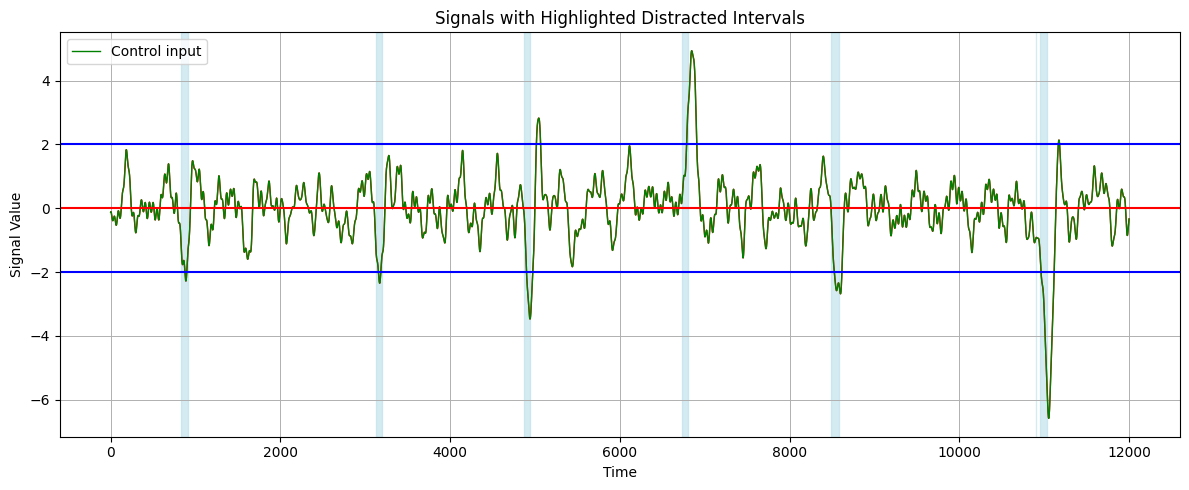

In [24]:
plot_signals_with_highlight(tc_test[:,0], error_distracted_list[0][0], error_distracted_list[0][0], label1="", label2="Control input")

std = np.std(error_not_distracted_list[0][0])
mean = np.mean(error_not_distracted_list[0][0])

plt.axhline(y=mean, color='r', linestyle='-')
plt.axhline(y=mean + 2 * std, color='b', linestyle='-')
plt.axhline(y=mean - 2 * std, color='b', linestyle='-')

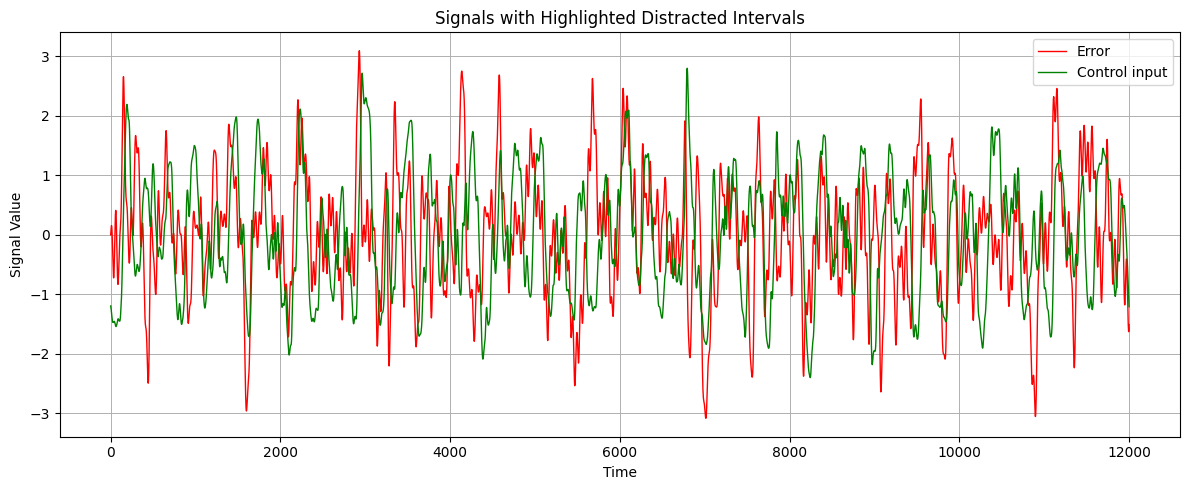

In [25]:
plot_signals_with_highlight(np.zeros(tc_test[:,0].shape), error_not_distracted_list[0][0], u_signal_not_distracted_list[0][0], label1="Error", label2="Control input")

## Plot sample signals

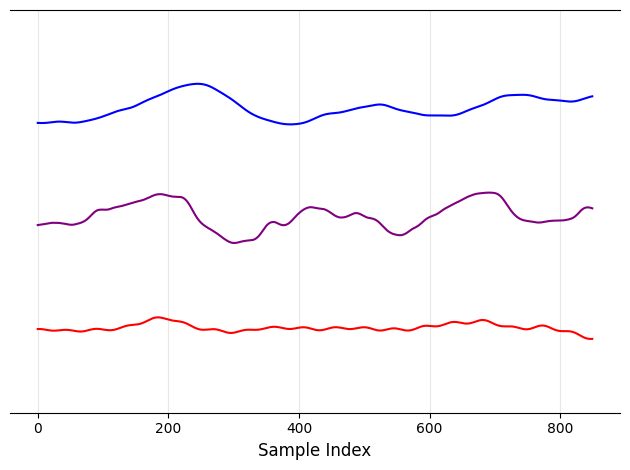

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Load signals
e_t = np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/e.csv', delimiter=",")[:850, 0]
u_t = 3 + np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/u.csv', delimiter=",")[:850, 0]
x_t = 6 + np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/x.csv', delimiter=",")[:850, 0]


plt.plot(e_t, color="red", label="e(t)", linewidth=1.5)
plt.plot(u_t, color="purple", label="u(t)", linewidth=1.5)
plt.plot(x_t, color="blue", label="x(t)", linewidth=1.5)

# Highlighting windows
window_1_start, window_1_end = 100, 550  # Adjusted to sample indices
window_2_start, window_2_end = 350, 800  # Adjusted to sample indices
# plt.axvspan(window_1_start, window_1_end, color="red", alpha=0.2, label="Window 1")
# plt.axvspan(window_2_start, window_2_end, color="blue", alpha=0.2, label="Window 2")

# Overlap annotation
overlap_center = (window_1_end + window_2_start) // 2
# plt.text(overlap_center, 15, "Overlap", color="blue", fontsize=12, ha="center")

plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Arrows and labels
# plt.annotate("Window 1", xy=(3000, 14), xytext=(2500, 17),
#              arrowprops=dict(facecolor="red", shrink=0.05), color="red", fontsize=10)
plt.annotate("Data window", xy=(4000, 18), xytext=(4500, 21),
             arrowprops=dict(facecolor="blue", shrink=0.05), color="blue", fontsize=10)

# Get y-limits of the plot and extend dashed lines accordingly
y_min, y_max = e_t.min() - 2, x_t.max() + 2  # Add padding for visual clarity
plt.ylim(y_min, y_max)

# Add vertical dashed lines for Window 1
# plt.plot([window_1_start, window_1_start], [y_min, y_max], '--', color="red", alpha=0.3)
# plt.plot([window_1_end, window_1_end], [y_min, y_max], '--', color="red", alpha=0.3)

# Add vertical dashed lines for Window 2
# plt.plot([window_2_start, window_2_start], [y_min, y_max], '--', color="blue", alpha=0.3)
# plt.plot([window_2_end, window_2_end], [y_min, y_max], '--', color="blue", alpha=0.3)

# Remove y-axis numbers
plt.gca().yaxis.set_ticks([])

# Labels and legend
plt.xlabel("Sample Index", fontsize=12)
# plt.legend(loc="upper right", fontsize=12)
# plt.title("Overlapping Signal Windows", fontsize=14)
plt.grid(alpha=0.3)

# Show plot
plt.tight_layout()
plt.show()

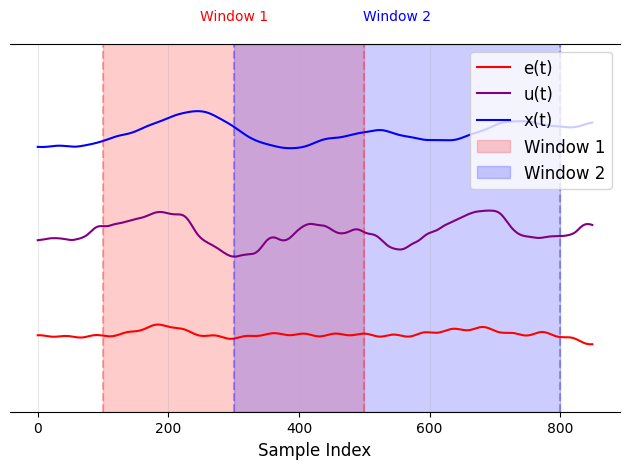

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Load signals
e_t = np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/e.csv', delimiter=",")[:850, 0]
u_t = 3 + np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/u.csv', delimiter=",")[:850, 0]
x_t = 6 + np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/x.csv', delimiter=",")[:850, 0]

# Plot signals
plt.plot(e_t, color="red", label="e(t)", linewidth=1.5)
plt.plot(u_t, color="purple", label="u(t)", linewidth=1.5)
plt.plot(x_t, color="blue", label="x(t)", linewidth=1.5)

# Highlighting windows
window_1_start, window_1_end = 100, 500
window_2_start, window_2_end = 300, 800
plt.axvspan(window_1_start, window_1_end, color="red", alpha=0.2, label="Window 1")
plt.axvspan(window_2_start, window_2_end, color="blue", alpha=0.2, label="Window 2")

# Get y-limits of the plot and extend dashed lines accordingly
y_min, y_max = e_t.min() - 2, x_t.max() + 2
plt.ylim(y_min, y_max)

# Add vertical dashed lines for Window 1
plt.plot([window_1_start, window_1_start], [y_min, y_max], '--', color="red", alpha=0.3)
plt.plot([window_1_end, window_1_end], [y_min, y_max], '--', color="red", alpha=0.3)

# Add vertical dashed lines for Window 2
plt.plot([window_2_start, window_2_start], [y_min, y_max], '--', color="blue", alpha=0.3)
plt.plot([window_2_end, window_2_end], [y_min, y_max], '--', color="blue", alpha=0.3)

# Arrows and labels for the windows
arrow_y = y_max + 0.5
plt.annotate('', xy=(window_1_end, arrow_y), xytext=(window_1_start, arrow_y),
             arrowprops=dict(arrowstyle='<->', color='red', lw=1.5))
plt.text((window_1_start + window_1_end) / 2, arrow_y + 0.2, 'Window 1', color='red', ha='center', fontsize=10)

plt.annotate('', xy=(window_2_end, arrow_y), xytext=(window_2_start, arrow_y),
             arrowprops=dict(arrowstyle='<->', color='blue', lw=1.5))
plt.text((window_2_start + window_2_end) / 2, arrow_y + 0.2, 'Window 2', color='blue', ha='center', fontsize=10)

# Remove only vertical (left and right) spines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Remove y-axis numbers
plt.gca().yaxis.set_ticks([])

# Labels and legend
plt.xlabel("Sample Index", fontsize=12)
plt.legend(loc="upper right", fontsize=12)
plt.grid(alpha=0.3)

# Show plot
plt.tight_layout()
plt.show()


## Plot examples of time traces of the signals

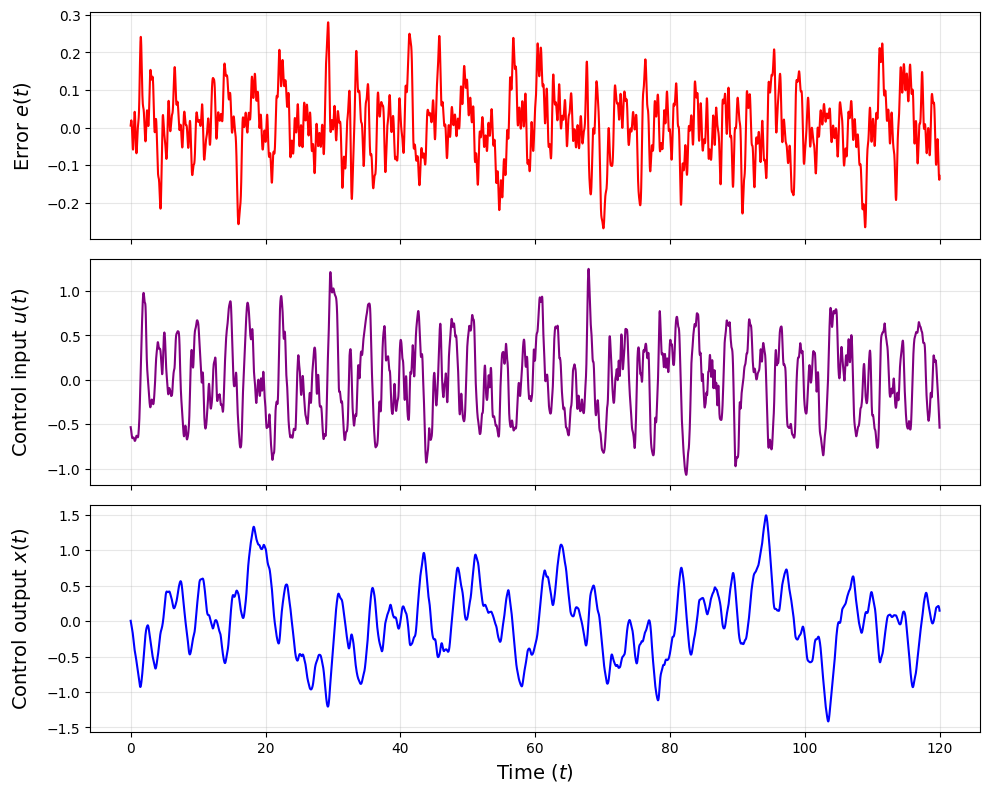

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Load signals
e_t = np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/e.csv', delimiter=",")[:, 0]
u_t = np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/u.csv', delimiter=",")[:, 0]
x_t = np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/x.csv', delimiter=",")[:, 0]
tc = np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/mdist.csv', delimiter=",")[:, 0]

e_t = np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRN/e.csv', delimiter=",")[:, 0]
u_t = np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRN/u.csv', delimiter=",")[:, 0]
x_t = np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRN/x.csv', delimiter=",")[:, 0]
tc = np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRN/mdist.csv', delimiter=",")[:, 0]


time = np.arange(len(tc)) / 100

# Create a figure and subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Plot e_t
# Plot e_t with highlighted regions
axes[0].fill_between(time, e_t.min(), e_t.max()+2, where=tc == 1, 
                     color='lightblue', alpha=0.5, transform=axes[0].get_xaxis_transform())
axes[0].plot(time, e_t, color="red", linewidth=1.5)
axes[0].set_ylabel(r"Error $e(t)$", fontsize=14, labelpad=10)
axes[0].grid(alpha=0.3)

# Plot u_t
# Plot e_t with highlighted regions
axes[1].fill_between(time, u_t.min(), u_t.max(), where=tc == 1, 
                     color='lightblue', alpha=0.5, transform=axes[0].get_xaxis_transform())
axes[1].plot(time, u_t, color="purple", linewidth=1.5)
axes[1].set_ylabel(r"Control input $u(t)$", fontsize=14, labelpad=10)
axes[1].grid(alpha=0.3)

# Plot x_t
# Plot e_t with highlighted regions
axes[2].fill_between(time, x_t.min()-2, x_t.max()+2, where=tc == 1, 
                     color='lightblue', alpha=0.5, transform=axes[0].get_xaxis_transform())
axes[2].plot(time, x_t, color="blue", linewidth=1.5)
axes[2].set_ylabel(r"Control output $x(t)$", fontsize=14, labelpad=10)
axes[2].set_xlabel(r"Time ($t$)", fontsize=14)
axes[2].grid(alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
plot_signals_with_highlight(tc)

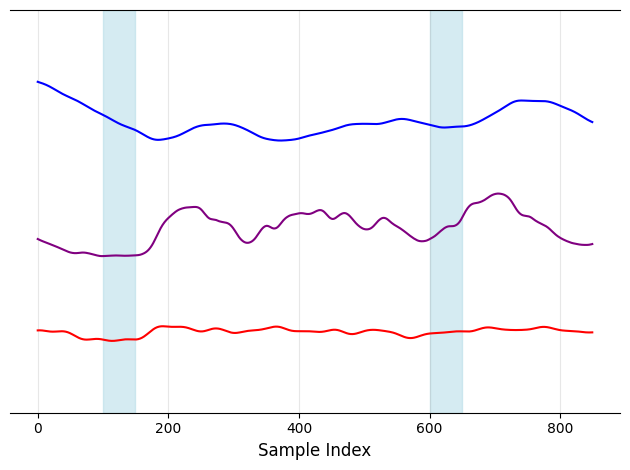

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Load signals
e_t = np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/e.csv', delimiter=",")[1500:1500+850, 0]
u_t = 3 + np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/u.csv', delimiter=",")[1500:1500+850, 0]
x_t = 6 + np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/x.csv', delimiter=",")[1500:1500+850, 0]
tc_test = np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/mdist.csv', delimiter=",")[1500:1500+850, 0]

tc_test[100:150] = 1
tc_test[600:650] = 1

plt.plot(e_t, color="red", label="e(t)", linewidth=1.5)
plt.plot(u_t, color="purple", label="u(t)", linewidth=1.5)
plt.plot(x_t, color="blue", label="x(t)", linewidth=1.5)

# Highlighting windows
window_1_start, window_1_end = 100, 550  # Adjusted to sample indices
window_2_start, window_2_end = 350, 800  # Adjusted to sample indices
# plt.axvspan(window_1_start, window_1_end, color="red", alpha=0.2, label="Window 1")
# plt.axvspan(window_2_start, window_2_end, color="blue", alpha=0.2, label="Window 2")

# Overlap annotation
overlap_center = (window_1_end + window_2_start) // 2
# plt.text(overlap_center, 15, "Overlap", color="blue", fontsize=12, ha="center")

plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Arrows and labels
# plt.annotate("Window 1", xy=(3000, 14), xytext=(2500, 17),
#              arrowprops=dict(facecolor="red", shrink=0.05), color="red", fontsize=10)
plt.annotate("Data window", xy=(4000, 18), xytext=(4500, 21),
             arrowprops=dict(facecolor="blue", shrink=0.05), color="blue", fontsize=10)

# Get y-limits of the plot and extend dashed lines accordingly
y_min, y_max = e_t.min() - 2, x_t.max() + 2  # Add padding for visual clarity
plt.ylim(y_min, y_max)
time = np.arange(len(tc_test)) 
# Highlight regions where tc == 1
plt.fill_between(time, 0, 1, where=np.array(tc_test) == 1, 
                    color='lightblue', alpha=0.5, transform=plt.gca().get_xaxis_transform())

# Add vertical dashed lines for Window 1
# plt.plot([window_1_start, window_1_start], [y_min, y_max], '--', color="red", alpha=0.3)
# plt.plot([window_1_end, window_1_end], [y_min, y_max], '--', color="red", alpha=0.3)

# Add vertical dashed lines for Window 2
# plt.plot([window_2_start, window_2_start], [y_min, y_max], '--', color="blue", alpha=0.3)
# plt.plot([window_2_end, window_2_end], [y_min, y_max], '--', color="blue", alpha=0.3)

# Remove y-axis numbers
plt.gca().yaxis.set_ticks([])

# Labels and legend
plt.xlabel("Sample Index", fontsize=12)
# plt.legend(loc="upper right", fontsize=12)
# plt.title("Overlapping Signal Windows", fontsize=14)
plt.grid(alpha=0.3)

# Show plot
plt.tight_layout()
plt.show()

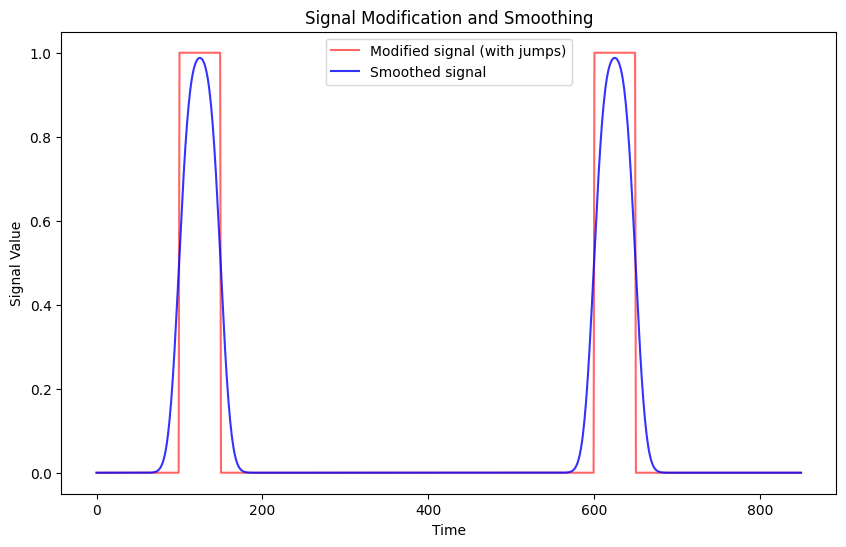

In [ ]:
from scipy.ndimage import gaussian_filter1d

tc_test[100:150] = 1
tc_test[600:650] = 1

# Apply smoothing to the signal to make the transitions smoother
smoothed_signal = gaussian_filter1d(tc_test, sigma=10) / 10

# Plotting both the original and smoothed signals
plt.figure(figsize=(10, 6))
plt.plot(tc_test, label="Modified signal (with jumps)", color='red', alpha=0.6)
plt.plot(smoothed_signal, label="Smoothed signal", color='blue', alpha=0.8)
plt.title("Signal Modification and Smoothing")
plt.xlabel("Time")
plt.ylabel("Signal Value")
plt.legend()
plt.show()